<a href="https://colab.research.google.com/github/nikesh11xx/eda-/blob/main/homicide_by_countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
# importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# loadinng dataset

df = pd.read_csv('/content/homicide_by_countries.csv')

- There are total 6 columns and 195 rows
- string columns => Location,Region,subregion
-int/floot columns => rate,count,year
- zero null value in this dataset


In [5]:
df.head()

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


In [7]:
df.shape

(195, 6)

In [8]:
df.isnull().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [10]:
df.dtypes

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

In [14]:
# converting data  type of some columns

my_list = ['Rate','Count','Year']

for i in my_list:
  df[i]= df[i].astype(np.int32)

In [15]:
df.dtypes

Location     object
Region       object
Subregion    object
Rate          int32
Count         int32
Year          int32
dtype: object

In [32]:
df1 = df.sort_values('Count',ascending = False)
df1

,Location,Region,Subregion,Rate,Count,Year
26,Brazil,Americas,South America,22,47722,2020
125,Nigeria,Africa,Western Africa,22,44200,2019
78,India,Asia,Southern Asia,3,40651,2020
111,Mexico,Americas,Central America,28,36579,2020
186,United States,Americas,Northern America,6,21570,2020
...,...,...,...,...,...,...
73,Holy See,Europe,Southern Europe,0,0,2015
38,Channel Islands,Europe,Northern Europe,0,0,2010
145,Saint Helena,Africa,Western Africa,0,0,2009
151,San Marino,Europe,Southern Europe,0,0,2011


In [35]:
df1 = df1[['Location','Count']].sort_values(by='Count',ascending=False).head(5)

In [40]:
df1['percentage'] = (df1['Count']*100/df1['Count'].sum()).round(2)
df1

,Location,Count,percentage
26,Brazil,47722,25.02
125,Nigeria,44200,23.18
78,India,40651,21.31
111,Mexico,36579,19.18
186,United States,21570,11.31


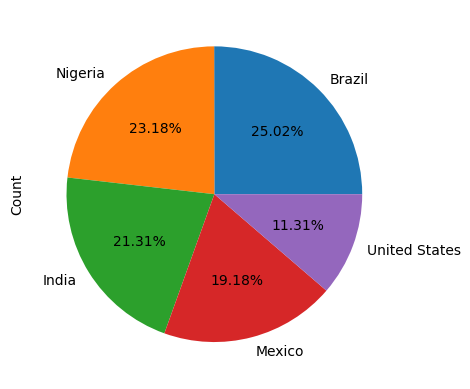

In [36]:

df1.plot(x ='Location',y='Count',kind='pie',labels=df1.Location,autopct='%1.2f%%')
plt.legend().set_visible(False)

<Axes: xlabel='Region'>

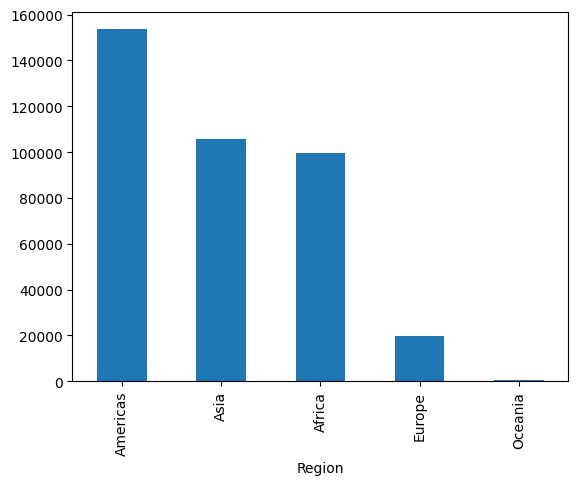

In [46]:
df2= df.groupby('Region')['Count'].sum().sort_values(ascending=False)
df2.plot(kind='bar')

In [50]:
df3 = df.groupby('Subregion')['Count'].sum().sort_values(ascending=False)
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int32

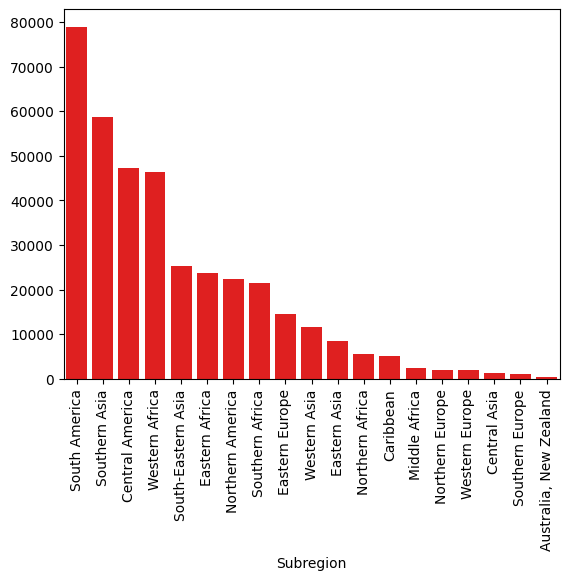

In [57]:
sns.barplot(x=df3.index,y=df3.values,color='red')
plt.xticks(rotation=90)
xlabel=None
plt.show()

In [60]:
df.Year.value_counts()

2020    94
2019    20
2018    13
2012    11
2017    10
2016     9
2015     9
2009     6
2014     5
2013     5
2011     5
2010     3
2006     2
2007     1
2021     1
2008     1
Name: Year, dtype: int64

In [78]:
df4 = df[df['Region'].isin(['Asia','Europe'])]
df4 = df4[df4['Year']>2016][['Region','Year','Count']]
df4 = df4.groupby(['Region','Year']).sum()['Count']

In [79]:
df_unstacked = df4.unstack(level=0)
df_unstacked

Region,Asia,Europe
Year,,
2017,1787.0,3670.0
2018,16923.0,883.0
2019,6458.0,249.0
2020,53516.0,15066.0
2021,15299.0,NaN


In [84]:
df_unstacked.index = df_unstacked.index.astype(int).astype(str)

Text(0.5, 1.0, 'Count of asia and europe')

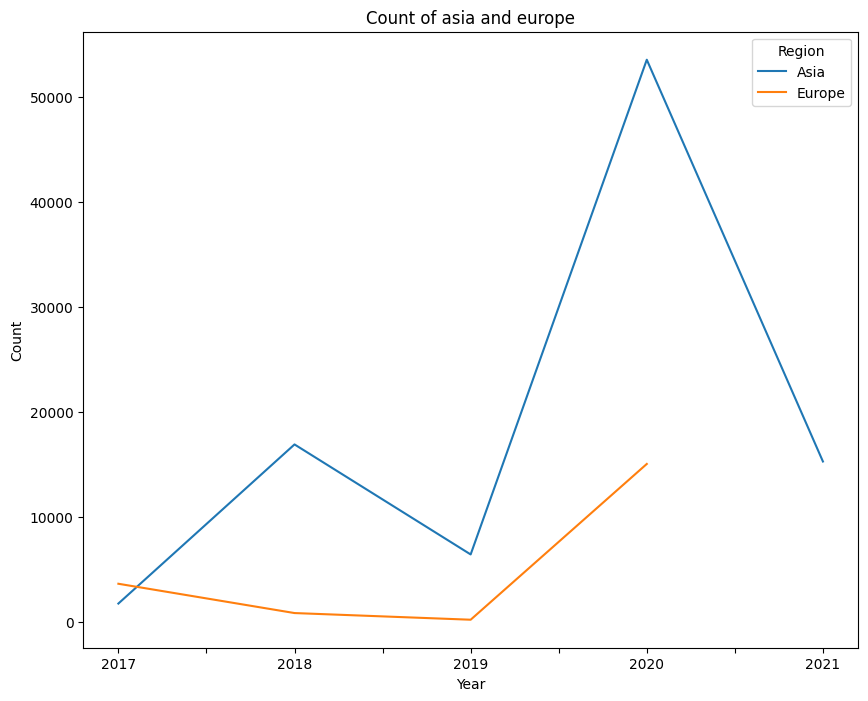

In [86]:
df_unstacked.plot(kind='line',figsize=(10,8))
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of asia and europe')

In [87]:
df5 = df.groupby(['Year'])['Rate'].sum().sort_values(ascending=False)

Text(0.5, 1.0, 'sum of rate by Region')

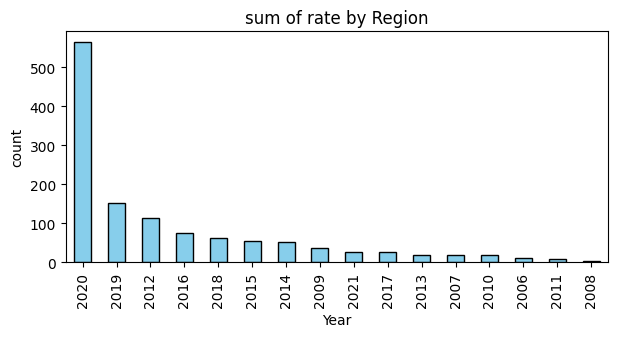

In [91]:
df5.plot(kind='bar',figsize=(7,3),color='skyblue',edgecolor='black')
plt.ylabel('count')
plt.title('sum of rate by Region')

In [94]:
df6 = df[['Year','Region','Count']]
df6 = df6.groupby(['Year','Region']).sum().sort_values(by='Year',ascending=False)
df6

Count
Year Region          
2021 Asia       15299
2020 Oceania      221
     Europe     15066
     Asia       53516
     Americas  134784
     Africa     28460
2019 Asia        6458
     Africa     44210
     Americas    4276
     Europe       249
     Oceania      126
2018 Europe       883
     Asia       16923
     Americas   13793
2017 Europe      3670
     Asia        1787
     Africa      1467
2016 Americas     608
     Europe         0
     Asia         627
     Africa      4987
2015 Asia         241
     Africa      2206
     Europe         0
2014 Asia        3029
     Americas      13
2013 Asia        5782
2012 Africa     15264
     Asia          61
     Americas      53
2011 Asia        1626
     Africa       855
     Europe         0
2010 Europe         1
     Africa       303
2009 Americas      42
     Africa        27
2008 Africa      1702
2007 Americas      26
2006 Asia         203
     Americas       2

Text(0.5, 1.0, 'Sum of Count Year and Region')

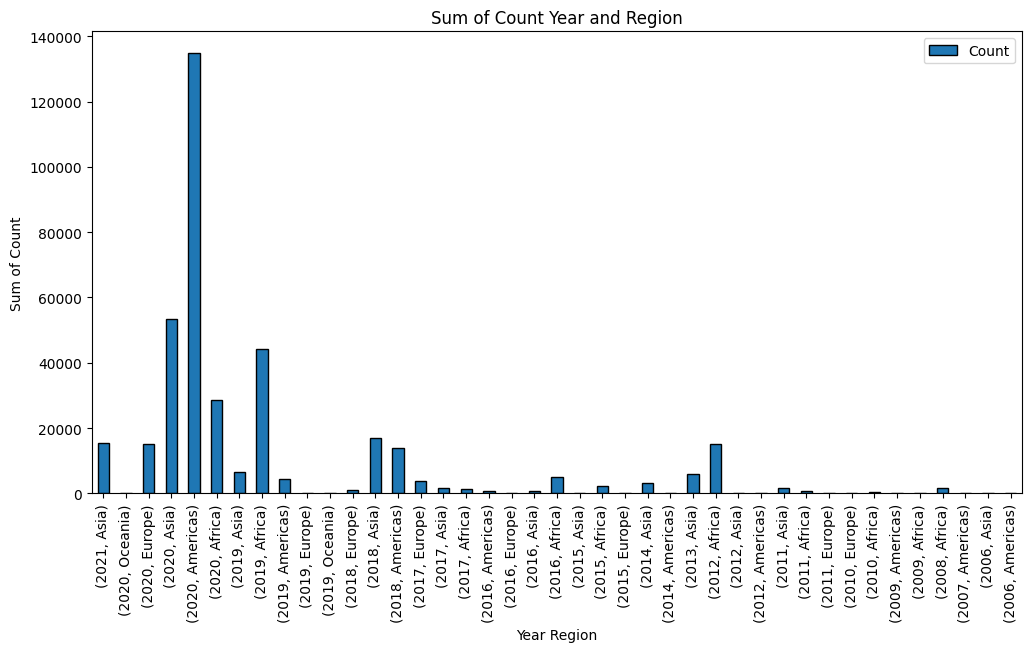

In [96]:
df6.plot(kind='bar',figsize=(12,6),edgecolor='black')
plt.xlabel('Year Region')
plt.ylabel('Sum of Count')
plt.title('Sum of Count Year and Region')

In [97]:
df7 = df.groupby('Subregion')['Count'].mean().sort_values(ascending=False).round(2)
df7

Subregion
Southern Asia             6514.56
South America             6067.08
Central America           5921.38
Northern America          4463.40
Southern Africa           4295.80
Western Africa            4210.73
South-Eastern Asia        2531.40
Eastern Africa            1577.93
Eastern Europe            1460.40
Eastern Asia              1223.29
Northern Africa           1107.60
Middle Africa              619.25
Western Asia               581.90
Central Asia               281.20
Western Europe             230.56
Caribbean                  201.48
Australia, New Zealand     173.50
Northern Europe            139.80
Southern Europe             64.29
Name: Count, dtype: float64

In [98]:
data= {
    'Category':df7.index,
    'Value':df7.values,
    'info':df7.values
}

df = pd.DataFrame(data)
df

,Category,Value,info
0,Southern Asia,6514.56,6514.56
1,South America,6067.08,6067.08
2,Central America,5921.38,5921.38
3,Northern America,4463.40,4463.40
4,Southern Africa,4295.80,4295.80
5,Western Africa,4210.73,4210.73
6,South-Eastern Asia,2531.40,2531.40
7,Eastern Africa,1577.93,1577.93
8,Eastern Europe,1460.40,1460.40
9,Eastern Asia,1223.29,1223.29


In [104]:
fig = px.treemap(df,path=['Category'],values='Value',title='Treemap')
fig.show()